In [1]:
import numpy as np
import numba as nb


def f(x, y, p):
    derivatives = np.zeros(2)
    derivatives[0] = np.exp(-x)
    derivatives[1] = p*x
    
    return derivatives



In [2]:
x0 = 0
y0 = np.zeros(2)
y0[:] = [0, 0]

In [3]:
import derivatives as der

In [4]:
print(der.f(x0, y0, .5))

[-0.     -0.25    0.      0.0625]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import ODESolve as ODE

x0 = 0
y0 = np.zeros(2)
y0[:] = [0, 0]
dx0 = 0.01
p = .5
N_step = 100
dN = 1
x_final = 10

In [6]:
%%time
x, y, dx, end = ODE.ODEOneRun(x0, y0, dx0, p, N_step, dN, x_final)

ValueError: unable to broadcast argument 2 to output array
File "/Users/delaneyjannone/QKESolve/ODESolve.py", line 1, 

In [7]:
x_check = np.linspace(0,10,1000)
y0_check = 1 - np.exp(-x_check)
y1_check = .5*p*x_check**2

NameError: name 'x' is not defined

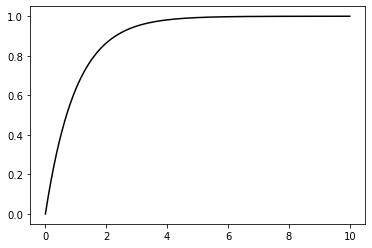

In [8]:
plt.figure()
plt.plot(x_check, y0_check, color = 'k')
plt.plot(x, y[:,0], 'o')
plt.show()

NameError: name 'x' is not defined

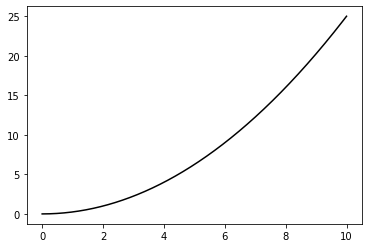

In [9]:
plt.figure()
plt.plot(x_check, y1_check, color = 'k')
plt.plot(x, y[:,1], 'o')
plt.show()

In [11]:
x0 = 0
y0 = np.zeros(4)
y0[:] = [1, 0, -p**2, 0]

In [12]:
import derivatives as der

In [13]:
print(der.f(x0, y0, np.pi))

[-0.         -9.8696044   0.         97.40909103]


In [14]:
@nb.jit(nopython=True)
def f(x, y, p):
    derivatives = np.zeros(4)
    derivatives[0] = y[1]
    derivatives[1] = y[2]
    derivatives[2] = y[3]
    derivatives[3] = p**4*y[0]
    
    return derivatives

print(f(x0, y0, np.pi))

[-0.         -9.8696044   0.         97.40909103]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ODESolve as ODE

x0 = 0
y0 = np.zeros(4)
y0[:] = [1, 0, -p**2, 0]
dx0 = 0.01
p = np.pi
N_step = 100
dN = 1
x_final = 10

NameError: name 'p' is not defined

In [26]:
%%time
x, y, dx, end = ODE.ODEOneRun(x0, y0, dx0, p, N_step, dN, x_final)

CPU times: user 528 µs, sys: 1 µs, total: 529 µs
Wall time: 534 µs


In [39]:
x_check = np.linspace(0,10,1000)
y0_check = np.cos(p*x_check)
y1_check = -p*np.sin(p*x_check)
y2_check = -p**2*np.cos(p*x_check)
y3_check = p**3*np.sin(p*x_check)


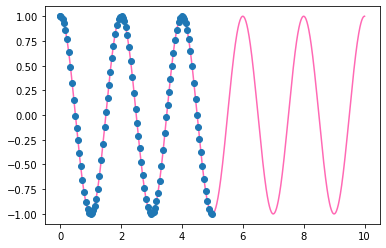

In [40]:
plt.figure()
plt.plot(x_check, y0_check, color = 'hotpink')
plt.plot(x, y[:,0], 'o')
plt.show()

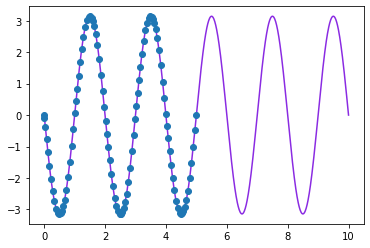

In [41]:
plt.figure()
plt.plot(x_check, y1_check, color = 'blueviolet')
plt.plot(x, y[:,1], 'o')
plt.show()

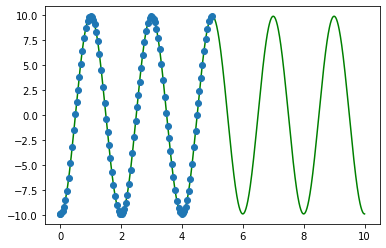

In [42]:
plt.figure()
plt.plot(x_check, y2_check, color = 'green')
plt.plot(x, y[:,2], 'o')
plt.show()

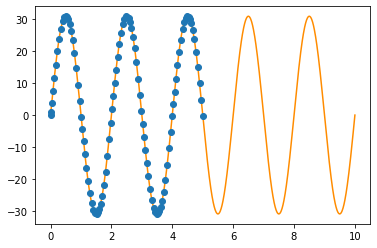

In [43]:
plt.figure()
plt.plot(x_check, y3_check, color = 'darkorange')
plt.plot(x, y[:,3], 'o')
plt.show()

In [45]:
y = np.arange(8)
M = np.zeros((2, 4))

print(y)
print(M)

[0 1 2 3 4 5 6 7]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [57]:
for i in range(2):
    for j in range(4):
        M[i,j] = y[4*i+j]
print(M)

[[0. 1. 2. 3.]
 [4. 5. 6. 7.]]


In [75]:
y = np.random.random(16)
M = np.zeros((len(y)//4,4))

for i in range(M.shape[0]):
    for j in range(4):
        M[i, j] = y[4*i+j]
    print(M[i,:])
print(M)

[0.35558998 0.79030798 0.2719297  0.46025663]
[0.80190709 0.34860777 0.73948741 0.11760784]
[0.61715233 0.33561586 0.49279154 0.45318843]
[0.74539146 0.1617907  0.01628517 0.67121324]
[[0.35558998 0.79030798 0.2719297  0.46025663]
 [0.80190709 0.34860777 0.73948741 0.11760784]
 [0.61715233 0.33561586 0.49279154 0.45318843]
 [0.74539146 0.1617907  0.01628517 0.67121324]]


In [90]:
def matrix_maker(y):
    matrix = np.zeros((len(y_input)//4,4))
    
    for i in range(M.shape[0]):
        for j in range(4):
            matrix[i,j]= y_input[4*i+j]
    return matrix

In [91]:
y_input = np.arange(24)
matrix = matrix_maker(y_input)

In [92]:
print(matrix)

[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]
 [12. 13. 14. 15.]
 [16. 17. 18. 19.]
 [20. 21. 22. 23.]]


In [93]:
for i in range(matrix.shape[0]):
    print(matrix[i,:])

[0. 1. 2. 3.]
[4. 5. 6. 7.]
[ 8.  9. 10. 11.]
[12. 13. 14. 15.]
[16. 17. 18. 19.]
[20. 21. 22. 23.]
